In [ ]:
import pandas as pd

In [ ]:
pop_df = pd.read_excel('Population.xls')

In [ ]:
store_df = pd.read_excel('Stores.xls')

In [ ]:
pop_df['lat'] = pop_df['lat'].round(6)
pop_df['lon'] = pop_df['lon'].round(6)

In [ ]:
store_df['lat'] = store_df['lat'].round(6)
store_df['lon'] = store_df['lon'].round(6)

In [ ]:
pop_df

In [ ]:
store_df['id'] = store_df.reset_index().index + 1
store_df

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
tree = cKDTree(store_df[['lat', 'lon']].values)

In [ ]:
distances, indices = tree.query(pop_df[['lat', 'lon']].values)

In [ ]:
pop_df['id'] = store_df.iloc[indices]['id'].values

In [ ]:
sorted_pop_df = pop_df.sort_values(by='id')
sorted_pop_df

In [14]:
mean_pop = sorted_pop_df.groupby('id').mean()
mean_pop

,lat,lon,metric population
id,,,
1,50.408410,30.522573,2.287106
2,50.493752,30.510203,2.310869
3,50.412008,30.652439,2.526525
4,50.474101,30.478355,2.073761
5,50.528940,30.610732,2.425420
...,...,...,...
88,50.457267,30.589902,2.581666
89,50.447093,30.604992,2.283306
90,50.474500,30.408489,1.934503


In [15]:
merged_df = store_df.merge(sorted_pop_df, on='id')
merged_df

,Store,lat_x,lon_x,Metric Store,id,lat_y,lon_y,metric population
0,Store 1,50.415258,30.522344,2.40,1,50.399967,30.525654,2.267018
1,Store 1,50.415258,30.522344,2.40,1,50.415469,30.525327,2.162661
2,Store 1,50.415258,30.522344,2.40,1,50.415587,30.525835,2.782889
3,Store 1,50.415258,30.522344,2.40,1,50.399690,30.528325,2.109045
4,Store 1,50.415258,30.522344,2.40,1,50.388687,30.525103,1.886812
...,...,...,...,...,...,...,...,...
12747,Store 92,50.471310,30.517505,1.43,92,50.468373,30.513463,1.607251
12748,Store 92,50.471310,30.517505,1.43,92,50.468156,30.514766,1.923375
12749,Store 92,50.471310,30.517505,1.43,92,50.468723,30.515675,2.008421
12750,Store 92,50.471310,30.517505,1.43,92,50.470240,30.517447,2.384632


In [16]:
merged_dfm = store_df.merge(mean_pop, on='id')
merged_dfm = merged_dfm.rename(columns={'metric population': 'metric_populationm'})
merged_dfm = merged_dfm.rename(columns={'Metric Store': 'Metric_Store'})
merged_dfm = merged_dfm.drop(['lon_y', 'lat_y'], axis=1)
merged_dfm

,Store,lat_x,lon_x,Metric_Store,id,metric_populationm
0,Store 1,50.415258,30.522344,2.40,1,2.287106
1,Store 2,50.495292,30.512299,1.25,2,2.310869
2,Store 3,50.414301,30.650869,1.44,3,2.526525
3,Store 4,50.471703,30.478740,2.26,4,2.073761
4,Store 5,50.532248,30.608288,2.15,5,2.425420
...,...,...,...,...,...,...
87,Store 88,50.456321,30.593928,1.39,88,2.581666
88,Store 89,50.453254,30.598383,1.92,89,2.283306
89,Store 90,50.472699,30.406233,1.84,90,1.934503
90,Store 91,50.411725,30.412683,1.01,91,2.054468


In [17]:
merged_dfm['cor']=merged_dfm.metric_populationm/merged_dfm.Metric_Store 
merged_dfm

,Store,lat_x,lon_x,Metric_Store,id,metric_populationm,cor
0,Store 1,50.415258,30.522344,2.40,1,2.287106,0.952961
1,Store 2,50.495292,30.512299,1.25,2,2.310869,1.848695
2,Store 3,50.414301,30.650869,1.44,3,2.526525,1.754531
3,Store 4,50.471703,30.478740,2.26,4,2.073761,0.917594
4,Store 5,50.532248,30.608288,2.15,5,2.425420,1.128102
...,...,...,...,...,...,...,...
87,Store 88,50.456321,30.593928,1.39,88,2.581666,1.857314
88,Store 89,50.453254,30.598383,1.92,89,2.283306,1.189222
89,Store 90,50.472699,30.406233,1.84,90,1.934503,1.051361
90,Store 91,50.411725,30.412683,1.01,91,2.054468,2.034127


In [18]:
import matplotlib.pyplot as plt

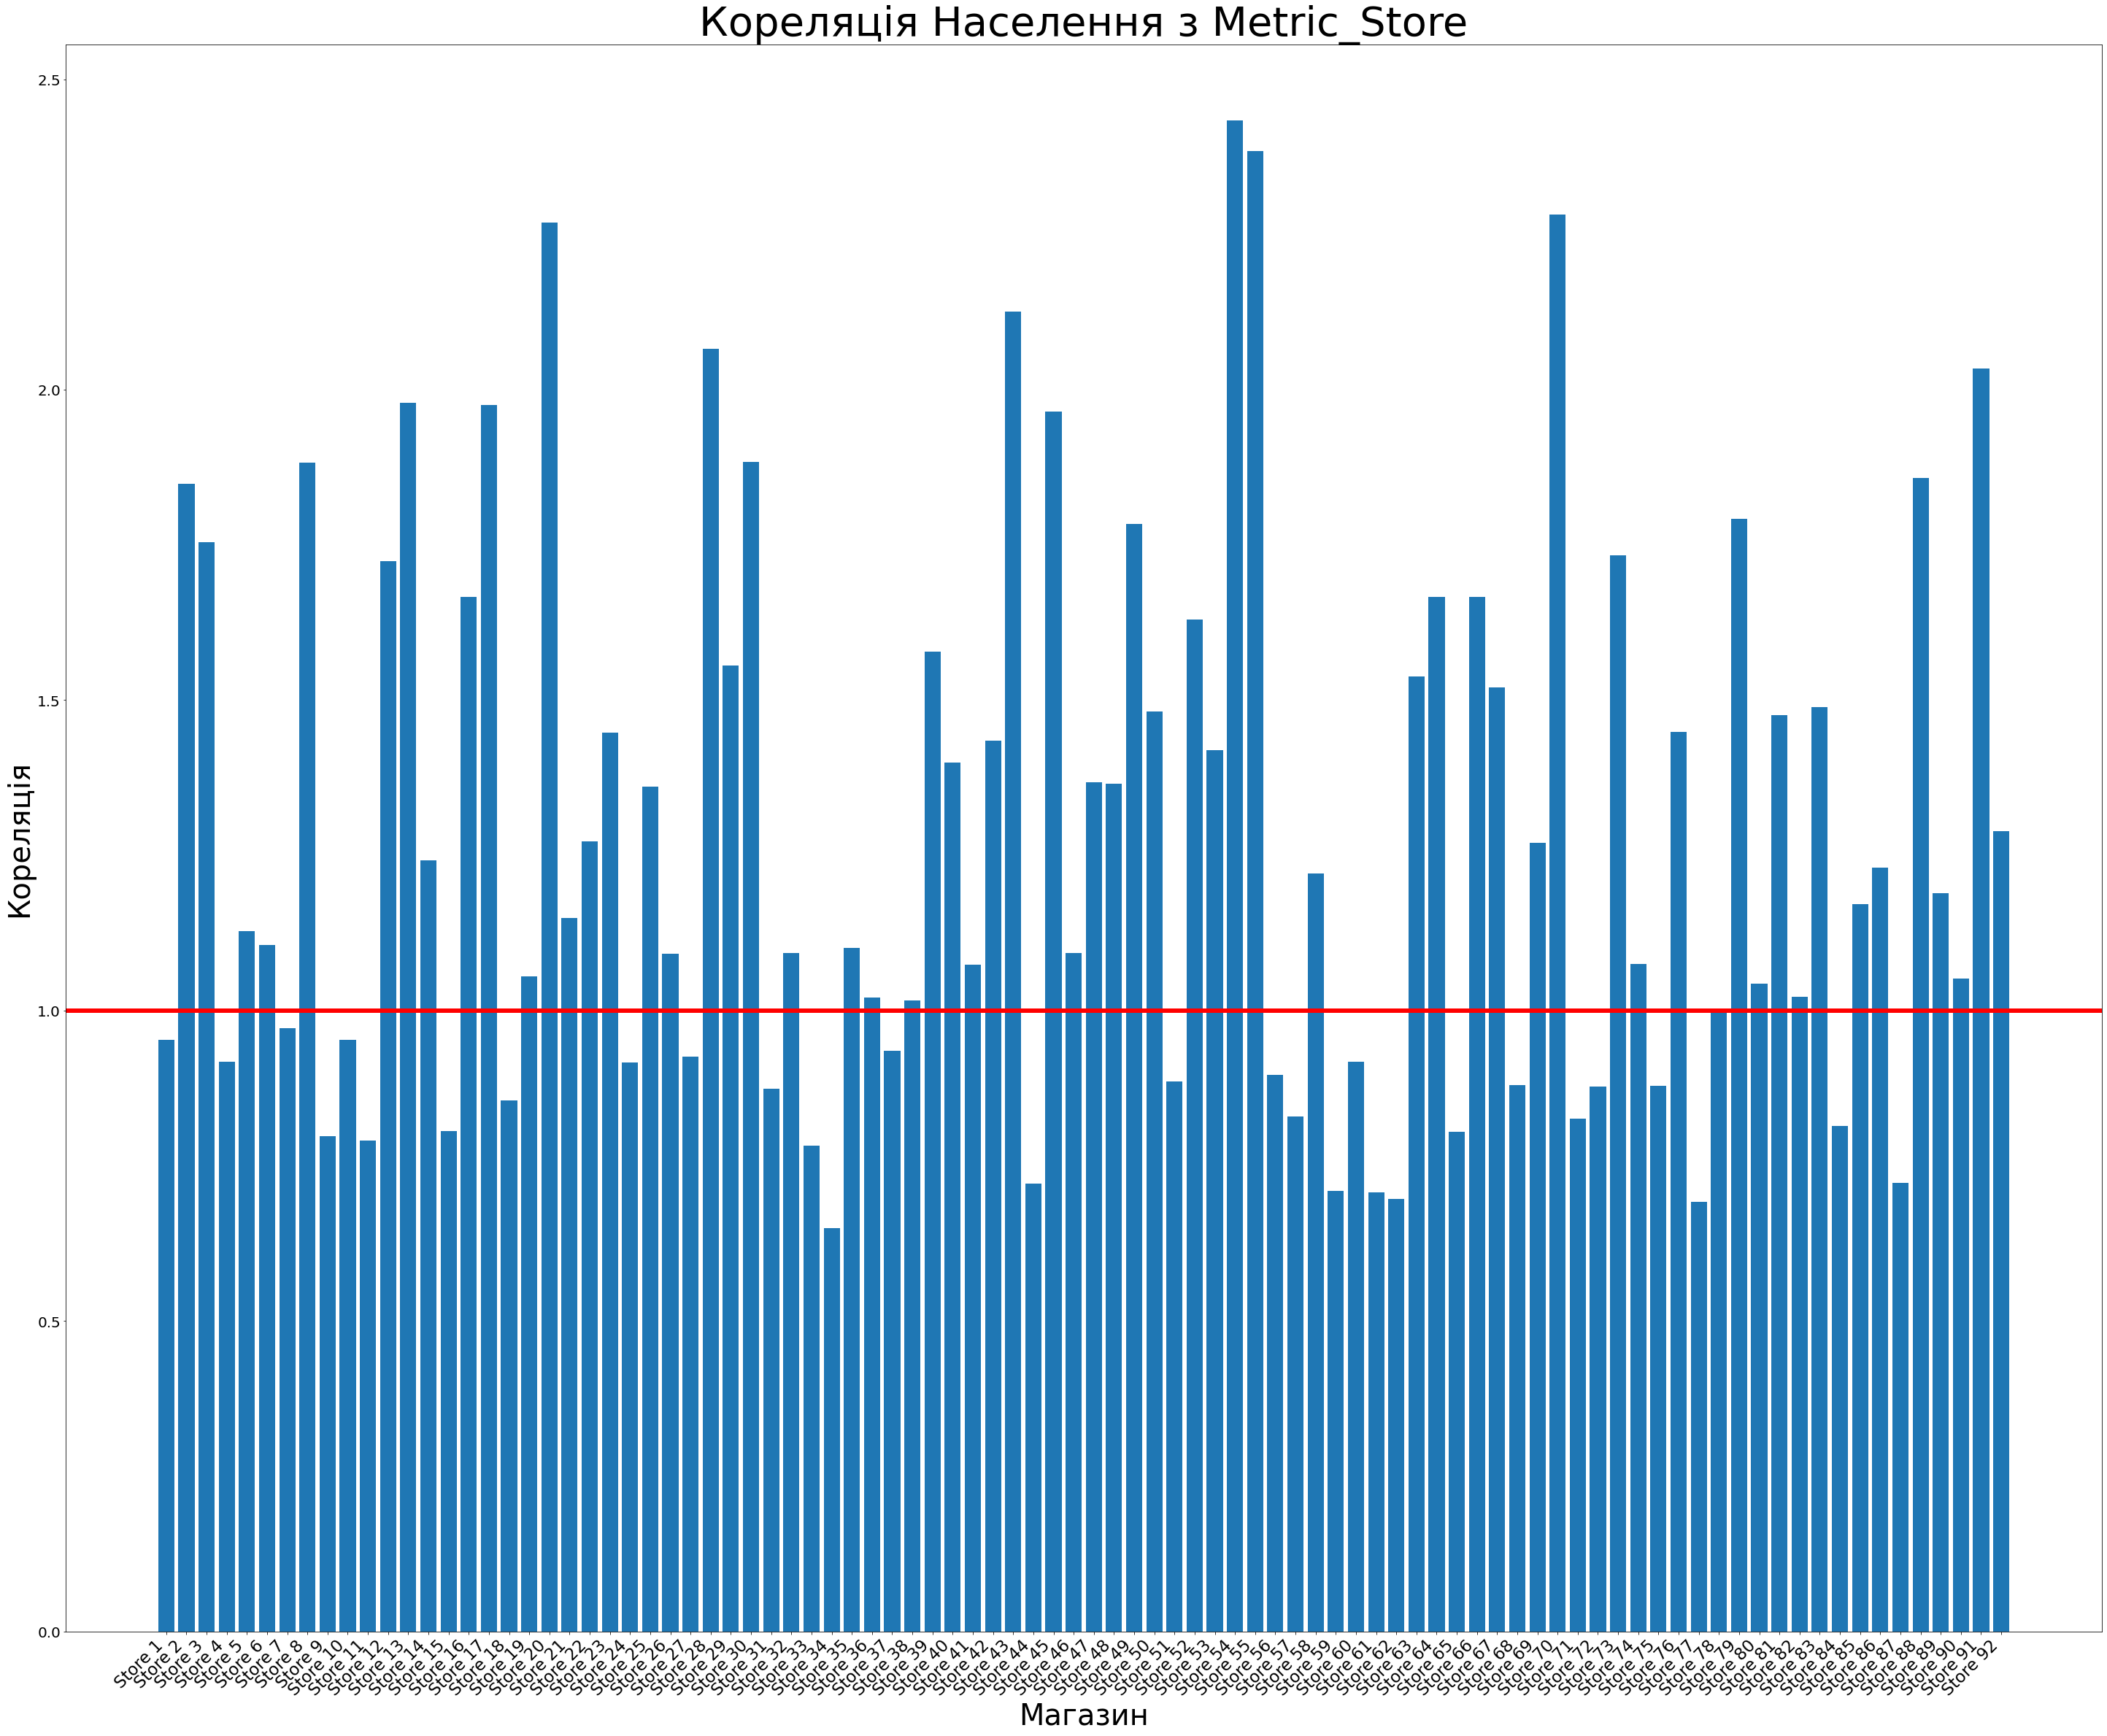

In [34]:
plt.figure(figsize=(50, 40))

plt.bar(merged_dfm['Store'], merged_dfm['cor'])
plt.xticks(rotation=45, ha='right', fontsize=23) 
plt.title('Кореляція Населення з Metric_Store', fontsize=56)
plt.xlabel('Магазин', fontsize=40)
plt.ylabel('Кореляція', fontsize=40)
plt.yticks(fontsize=20)
plt.axhline(y=1, color='r', linestyle='-', linewidth=6)
plt.show()